In [32]:
import numpy as np
# from qiskit import QuantumCircuit, Aer, transpile, assemble
# from qiskit import *
# from qiskit.visualization import plot_histogram
from math import gcd, sqrt, pi, trunc, exp, sqrt, sinh, log
# from numpy.random import randint
# import pandas as pd
# from scipy.linalg import expm, sinm, cosm
# from fractions import Fraction
from numpy import linalg as LA
# from qutip import *
from scipy.linalg import norm
# from sympy import I, Matrix, symbols
# from sympy.physics.quantum import TensorProduct
import time
# from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FuncFormatter
import os

In [33]:
Tc = 1.005

def Log_Setting(ax):
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(FuncFormatter(lambda y, _: '{:.16g}'.format(y)))

def Size_Print(Dimension, Size):
    str = f"Size = {Size}"
    
    for i in range(Dimension - 1):     
        str += f" x {Size}"
    
    # str += ")"

    return str

LOCATION = '/mnt/d/Research/potts/fig'

In [34]:
file = open(os.path.join('/mnt/d/Research/potts/data', 'data potts (corr).txt'), "r")

lines = file.readlines()
Irreducible_State = []
Irreducible_Dimension = []
Irreducible_Size = []
Irreducible_Temperature = []

for x in lines:
    if(int(x.split(' ')[0]) not in Irreducible_State):
        Irreducible_State.append(int(x.split(' ')[0]))

    if(int(x.split(' ')[1]) not in Irreducible_Dimension):
        Irreducible_Dimension.append(int(x.split(' ')[1]))
    
    if(int(x.split(' ')[2]) not in Irreducible_Size):
        Irreducible_Size.append(int(x.split(' ')[2]))

    if(float(x.split(' ')[7]) not in Irreducible_Temperature):
        Irreducible_Temperature.append(float(x.split(' ')[7]))

Irreducible_State = sorted(Irreducible_State)
Irreducible_Dimension = sorted(Irreducible_Dimension)
Irreducible_Size = sorted(Irreducible_Size)
Irreducible_Temperature = sorted(Irreducible_Temperature)

N_State = np.size(Irreducible_State)
N_Dimension = np.size(Irreducible_Dimension)
N_Size = np.size(Irreducible_Size)
N_Temperature = np.size(Irreducible_Temperature)

print(Irreducible_Size)
print(Irreducible_Temperature)

Distance, Correlation_Function = [[[[[] for _ in range(N_Temperature)] for _ in range(N_Size)] for _ in range(N_Dimension)] for _ in range(N_State)], [[[[[] for _ in range(N_Temperature)] for _ in range(N_Size)] for _ in range(N_Dimension)] for _ in range(N_State)]

for x in lines:
    i = Irreducible_State.index(int(x.split(' ')[0]))
    j = Irreducible_Dimension.index(int(x.split(' ')[1]))
    k = Irreducible_Size.index(int(x.split(' ')[2]))
    l = Irreducible_Temperature.index(float(x.split(' ')[7]))

    if(float(x.split(' ')[8]) == 0):
        Distance[i][j][k][l].append(float(x.split(' ')[9]))
        Correlation_Function[i][j][k][l].append(float(x.split(' ')[10]))

print(Distance[Irreducible_State.index(3)][Irreducible_Dimension.index(2)][Irreducible_Size.index(8)][Irreducible_Temperature.index(1.005)])

file.close()

[8, 16, 32, 64]
[0.5953999999999999, 0.8001999999999999, 0.9025999999999998, 0.9537999999999999, 0.9793999999999999, 0.9921999999999999, 0.9985999999999999, 1.0017999999999998, 1.0033999999999998, 1.0042, 1.005, 1.0057999999999998, 1.0066, 1.0082, 1.0113999999999999, 1.0177999999999998, 1.0306, 1.0561999999999998, 1.1074, 1.2098, 1.4145999999999999]
[0.0, 1.0, 2.0, 3.0, 4.0, 1.4142135623730951, 2.23606797749979, 3.1622776601683795, 4.123105625617661, 2.8284271247461903, 3.605551275463989, 4.47213595499958, 4.242640687119285, 5.0, 5.656854249492381]


In [35]:
for i in range(N_State):
    for j in range(N_Dimension):
        for k in range(N_Size):
            for l in range(N_Temperature):
                if(np.size(Correlation_Function[i][j][k][l]) != 0):
                    temp1 = np.vstack([Distance[i][j][k][l], Correlation_Function[i][j][k][l]])
                
                    temp2 = temp1 [ :, temp1[0].argsort()]

                    Distance[i][j][k][l] = temp2[0]
                    Correlation_Function[i][j][k][l] = temp2[1]

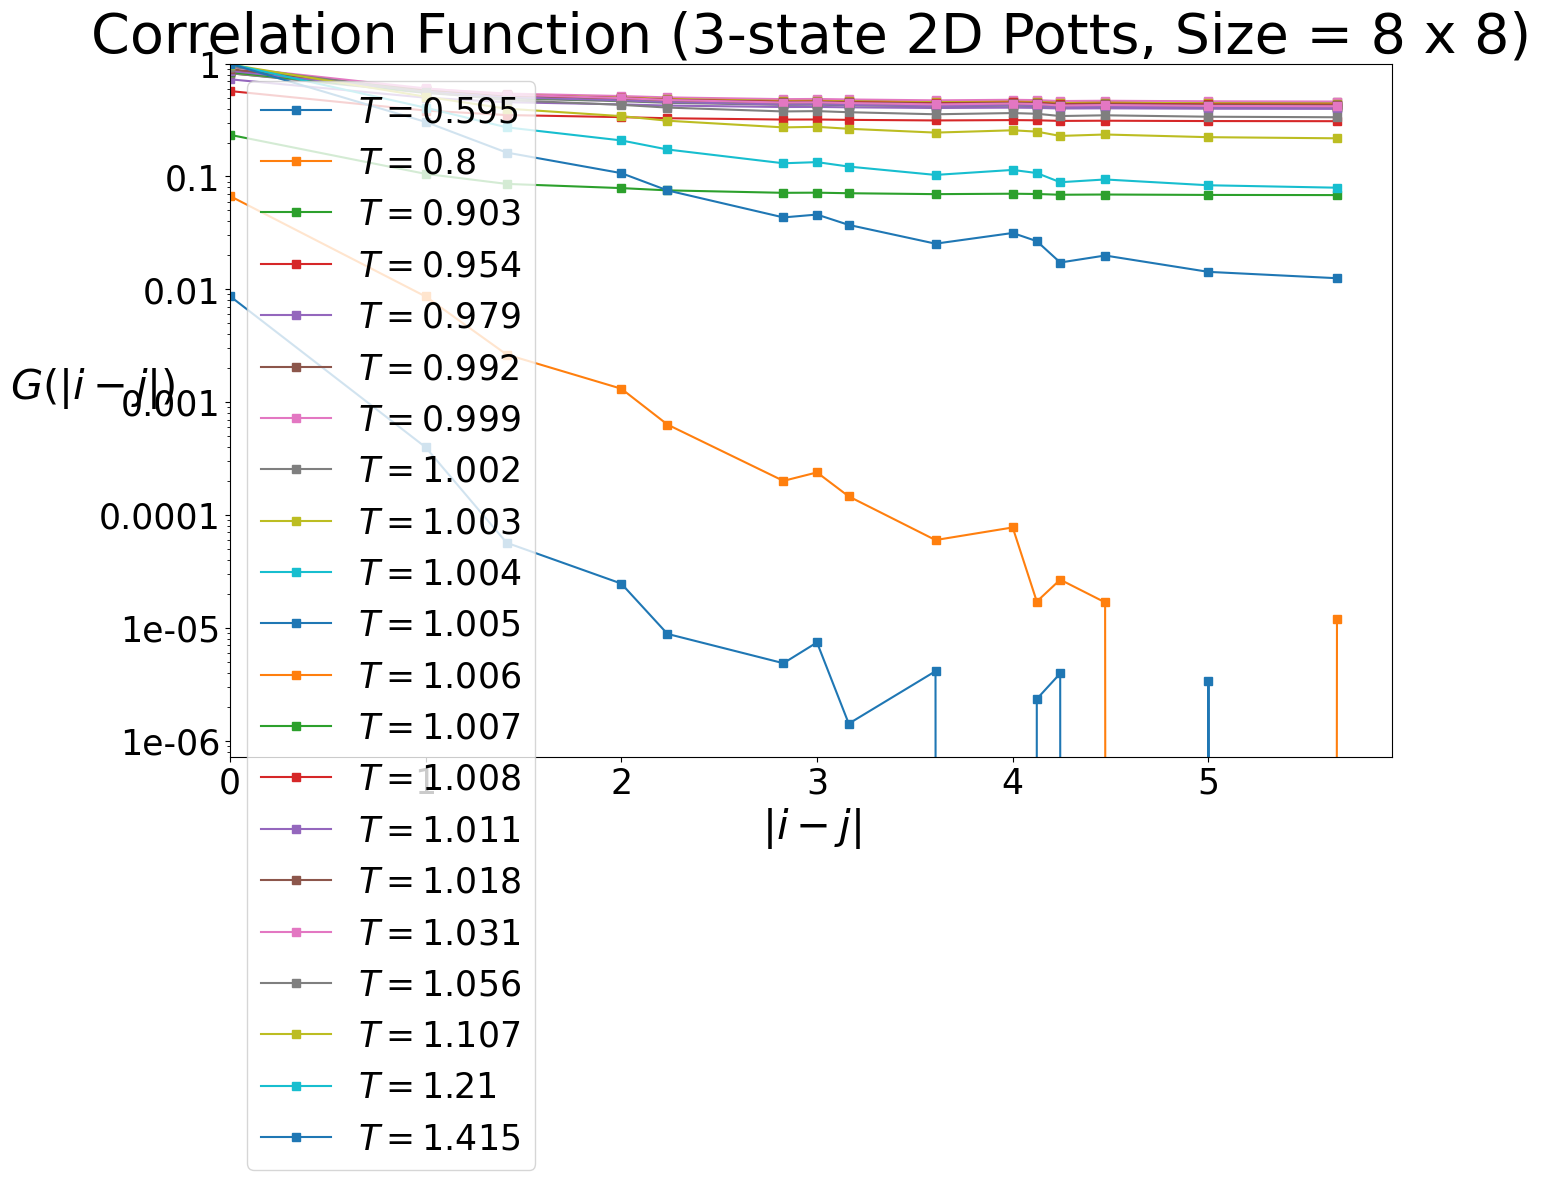

In [42]:
fig, ax = plt.subplots(figsize = (15, 9))

State = 3
Dimension = 2
Size = 8

q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)
N = Irreducible_Size.index(Size)

for i in range(N_Temperature):
    T = Irreducible_Temperature[i]

    if(len(Correlation_Function[q][D][N][i]) != 0):
        ax.plot(Distance[q][D][N][i], Correlation_Function[q][D][N][i], 's-', label = f'$T = {round(T, 3)}$')

ax.set_title(f"Correlation Function ({State}-state {Dimension}D Potts, {Size_Print(Dimension, Size)})", fontsize = 40)

# ax.set_xscale('log')
ax.set_yscale('log')

Log_Setting(ax)

ax.set_xlabel("$|i-j|$", fontsize = 30)
ax.set_ylabel("$G(|i-j|)$", fontsize = 30, rotation = 0)

ax.axis([0, None, None, 1])
ax.tick_params(axis = 'both', labelsize = 25)

ax.legend(fontsize=25,loc='best')

fig.savefig(os.path.join(LOCATION, f'Correlation Function ({State}-state {Dimension}D Potts, {Size_Print(Dimension, Size)}).jpg'))

plt.show()

In [43]:
Data = [[[[[0 for i in range(3)] for i in range(N_Temperature)] for _ in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)]
Correlation_Temperature, Correlation_Length = [[[[] for _ in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)], [[[[] for _ in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)]

From = 1
To = 10

for i in range(N_State):
    for j in range(N_Dimension):
        for k in range(N_Size):
            for l in range(N_Temperature):
                Temperature = Irreducible_Temperature[l]

                if(np.size(Correlation_Function[i][j][k][l]) != 0):
                    x, y = [], []

                    for m in range(np.size(Distance[i][j][k][l])):
                        if(Distance[i][j][k][l][m] >= From and Distance[i][j][k][l][m] <= To and Correlation_Function[i][j][k][l][m] > 0):
                            x.append(Distance[i][j][k][l][m])
                            y.append(log(Correlation_Function[i][j][k][l][m]))

                    x = np.array(x).reshape((-1, 1))

                    model = LinearRegression().fit(x, y)

                    Data[i][j][k][l][0] = model.intercept_
                    Data[i][j][k][l][1] = float(model.coef_)
                    Data[i][j][k][l][2] = model.score
                    
                    Correlation_Temperature[i][j][k].append(Temperature)
                    Correlation_Length[i][j][k].append(- 1.0 / float(model.coef_))

In [44]:
for i in range(N_State):
    for j in range(N_Dimension):
        for k in range(N_Size):
            if(np.size(Correlation_Length[i][j][k] != 0)):
                temp1 = np.vstack([Correlation_Temperature[i][j][k], Correlation_Length[i][j][k]])
                    
                temp2 = temp1 [ :, temp1[0].argsort()]

                Correlation_Temperature[i][j][k] = temp2[0]
                Correlation_Length[i][j][k] = temp2[1]

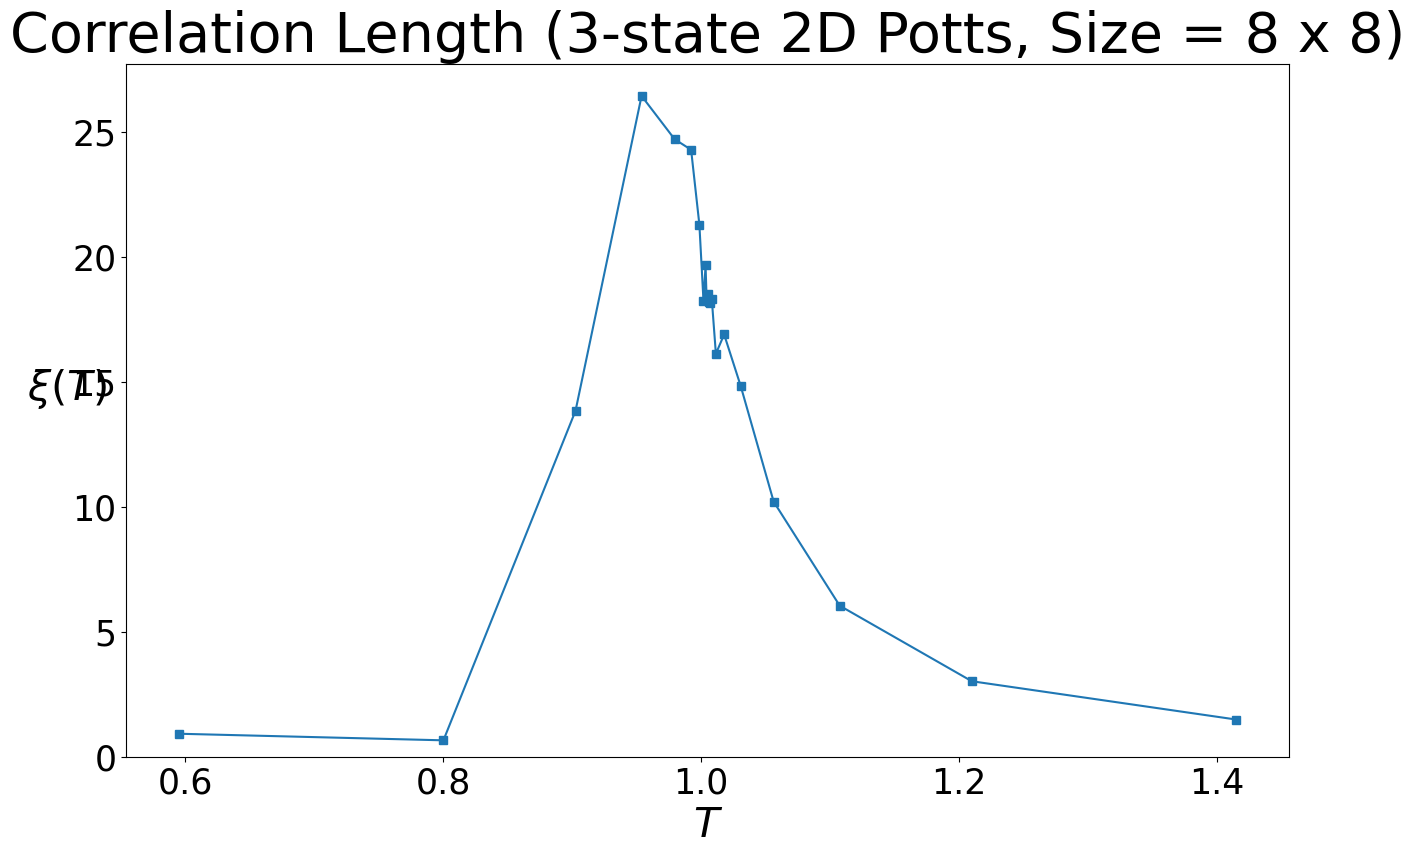

In [46]:
State = 3
Dimension = 2
Size = 8
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)
N = Irreducible_Size.index(Size)

fig, ax = plt.subplots(figsize = (15, 9))

ax.plot(Correlation_Temperature[q][D][N], Correlation_Length[q][D][N], 's-')

ax.set_title(f"Correlation Length ({State}-state {Dimension}D Potts, {Size_Print(Dimension, Size)})", fontsize = 40)

ax.set_xlabel("$T$", fontsize = 30)
ax.set_ylabel("$\\xi(T)$", fontsize = 30, rotation = 0)

ax.axis([None, None, 0, None])

ax.tick_params(axis = 'both', labelsize = 25)

fig.savefig(os.path.join(LOCATION, f'Correlation Length ({State}-state {Dimension}D Potts, {Size_Print(Dimension, Size)}).jpg'))

plt.show()

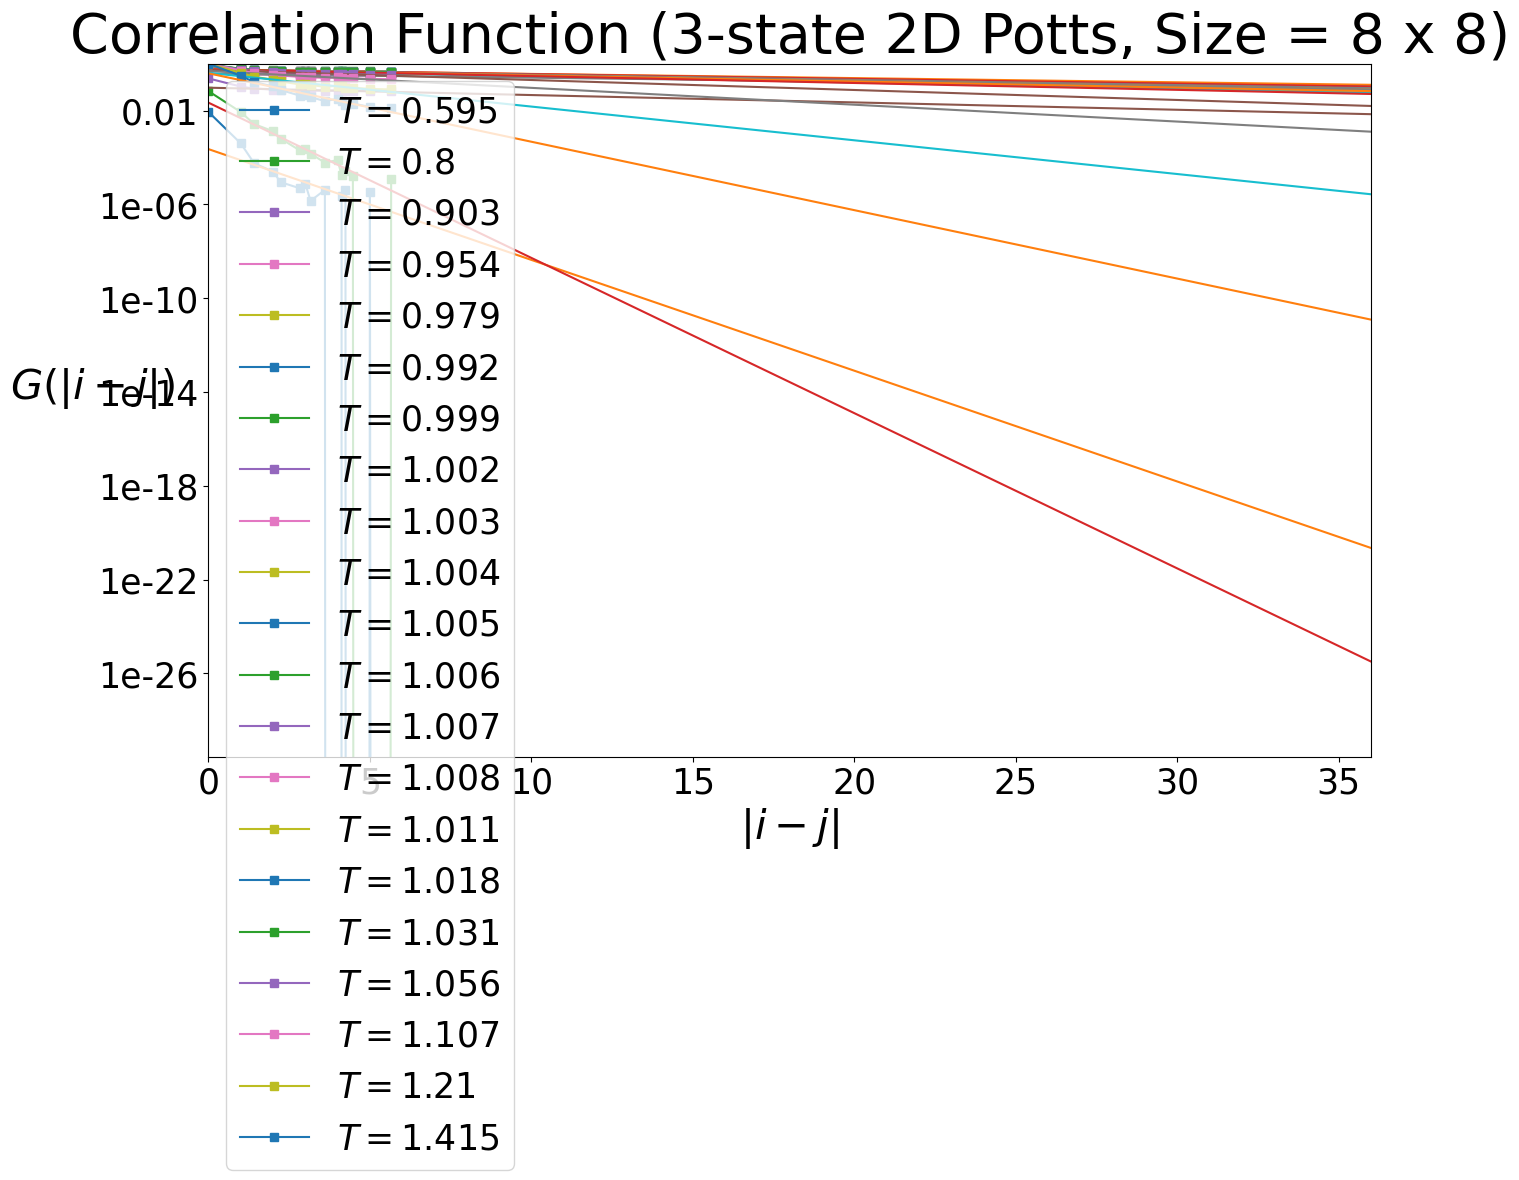

In [48]:
State = 3
Dimension = 2
Size = 8
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)
N = Irreducible_Size.index(Size)

fig, ax = plt.subplots(figsize = (15, 9))

for i in range(N_Temperature):
    Temperature = Irreducible_Temperature[i]

    if(np.size(Correlation_Function[q][D][N][i]) != 0):
        def f(x):
            return exp(Data[q][D][N][i][0] + Data[q][D][N][i][1] * x)
        
        x = np.linspace(0, 40, 100)
        y = np.vectorize(f)

        ax.plot(Distance[q][D][N][i], Correlation_Function[q][D][N][i], 's-', label = f'$T = {round(Temperature, 3)}$')
        ax.plot(x, y(x), '-')

ax.set_title(f"Correlation Function ({State}-state {Dimension}D Potts, {Size_Print(Dimension, Size)})", fontsize = 40)

ax.set_yscale('log')

Log_Setting(ax)

ax.set_xlabel("$|i-j|$", fontsize = 30)
ax.set_ylabel("$G(|i-j|)$", fontsize = 30, rotation = 0)

ax.axis([0, 36, None, 1])

ax.tick_params(axis = 'both', labelsize = 25)

ax.legend(fontsize=25, loc='best')

fig.savefig(os.path.join(LOCATION, f'Correlation Function with Regression ({State}-state {Dimension}D Potts, {Size_Print(Dimension, Size)}).jpg'))

plt.show()